## QUANTUM AUTOENCODER ##

In [1]:
import time
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np

/Users/edoardozappia/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def ansatz(init_weights, weights):
    qml.SimplifiedTwoDesign(initial_layer_weights=init_weights, weights=weights, wires=range(n_wires_latent+n_wires_trash))

In [3]:
def swap_test(num_latent, num_trash):
    auxiliary_qubit = num_latent + 2 * num_trash
    qml.Hadamard(auxiliary_qubit)
    for i in range(num_trash):
        qml.CSWAP(wires=[auxiliary_qubit, num_latent + i, num_latent + num_trash + i])

    qml.Hadamard(auxiliary_qubit)
    #return [qml.expval(qml.Z(auxiliary_qubit))]

In [4]:
n_wires_latent = 3
n_wires_trash = 2
n_wires_total = n_wires_latent + 2 * n_wires_trash +1

In [5]:
dev = qml.device("default.qubit", wires=n_wires_total)

In [6]:
def quantum_encoder_train(init_weights, weights, n_wires_latent, n_wires_trash):
    ansatz(init_weights, weights)
    swap_test(n_wires_latent, n_wires_trash)

In [7]:
@qml.qnode(dev)
def domain_wall(init_weights, weights):
    qml.X(2)
    qml.X(3)
    qml.X(4)
    quantum_encoder_train(init_weights, weights, n_wires_latent, n_wires_trash)
    return qml.expval(qml.Z(7))

In [28]:
initial_point = np.random.random(n_wires_latent)

In [33]:
shapes = qml.SimplifiedTwoDesign.shape(n_layers=2, n_wires=n_wires_latent+n_wires_trash)
weights = [np.random.random(size=shape) for shape in shapes]
print(np.shape(weights[0]))
print(shapes)
initial_point = weights[0]
weights = weights[1]
print(np.shape(weights))
#weights = np.reshape(weights, newshape=(2, 4 ,2))
#print(weights)

(5,)
[(5,), (2, 4, 2)]
(2, 4, 2)


(<Figure size 800x900 with 1 Axes>, <Axes: >)


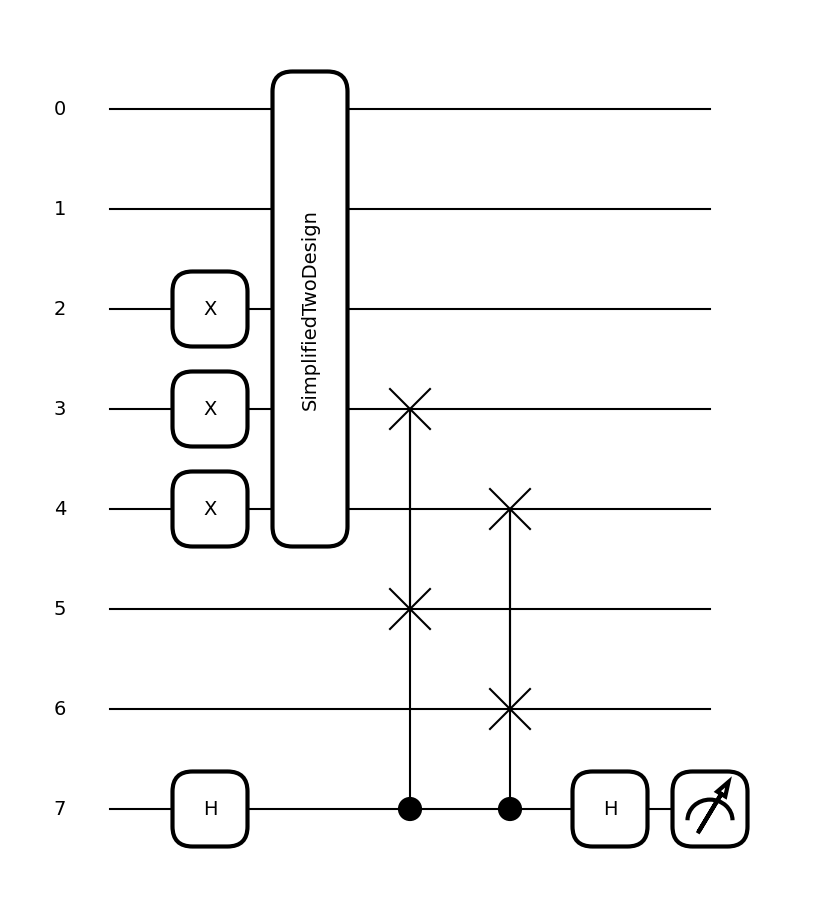

In [35]:
drawer = qml.draw_mpl(domain_wall)
print(drawer(initial_point, weights))